In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  mean_squared_error
from sklearn.preprocessing import StandardScaler

In [18]:
import numpy as np

In [2]:
df=pd.read_csv('Tip.csv')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [37]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [36]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 1.0, 'Scatter Plot of Total Bill vs Tip')

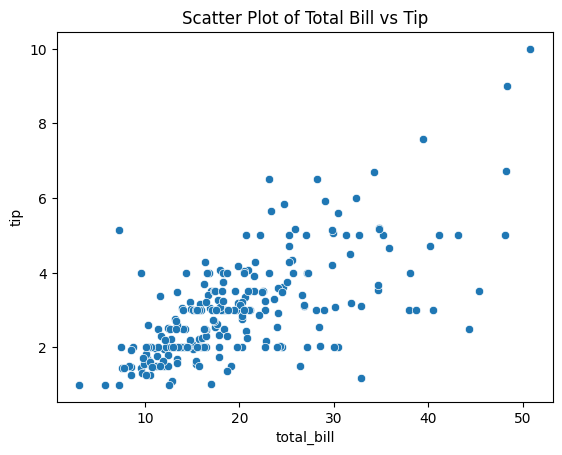

In [56]:
sns.scatterplot(data=df, x="total_bill", y="tip")
plt.title("Scatter Plot of Total Bill vs Tip")

# EDA

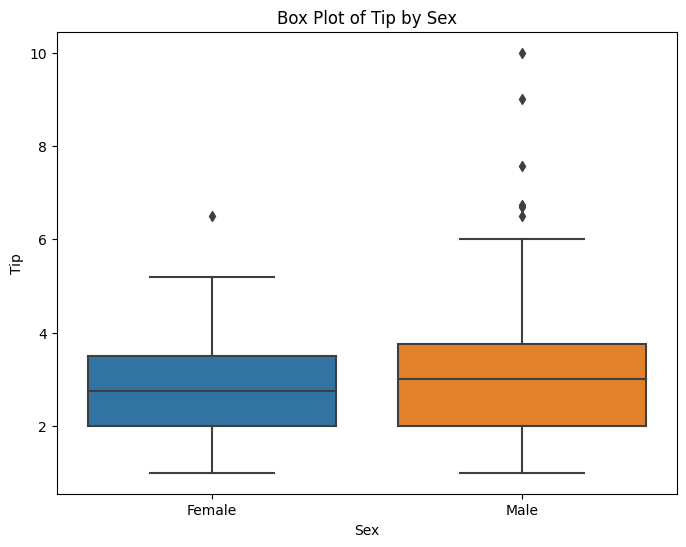

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['sex'], y=df["tip"])
plt.title(f"Box Plot of Tip by Sex")
plt.xlabel('Sex')
plt.ylabel("Tip")
plt.show()

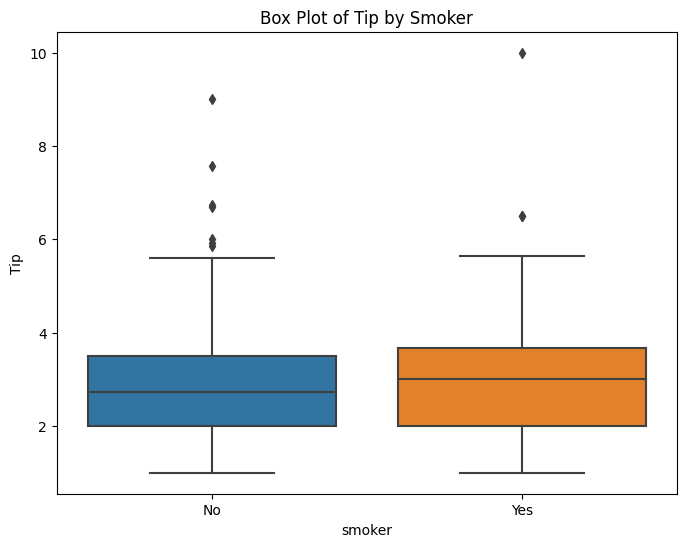

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['smoker'], y=df["tip"])
plt.title(f"Box Plot of Tip by Smoker")
plt.xlabel('smoker')
plt.ylabel("Tip")
plt.show()

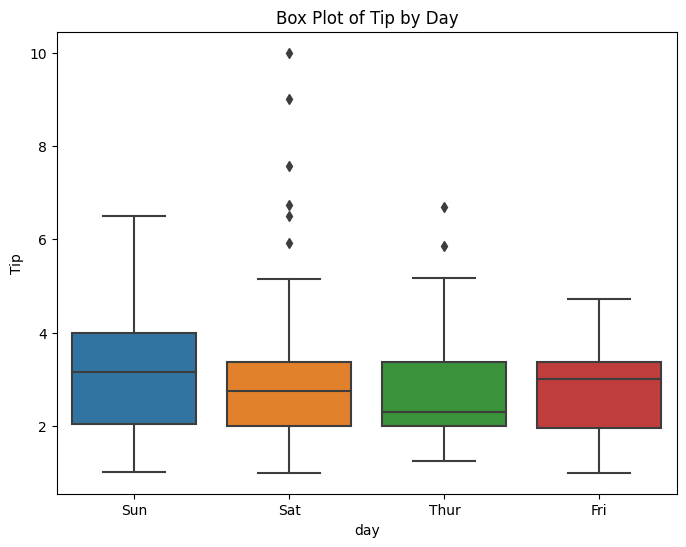

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['day'], y=df["tip"])
plt.title(f"Box Plot of Tip by Day")
plt.xlabel('day')
plt.ylabel("Tip")
plt.show()

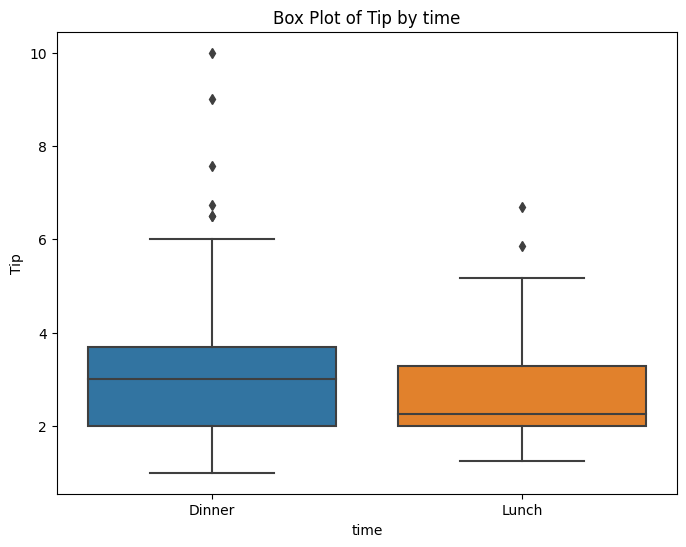

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['time'], y=df["tip"])
plt.title(f"Box Plot of Tip by time")
plt.xlabel('time')
plt.ylabel("Tip")
plt.show()

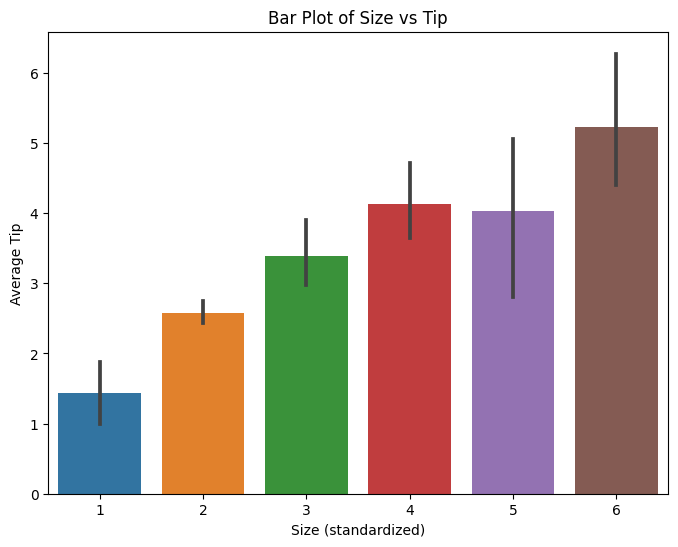

In [63]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="size", y="tip")
plt.title("Bar Plot of Size vs Tip")
plt.xlabel("Size (standardized)")
plt.ylabel("Average Tip")
plt.show()

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\s

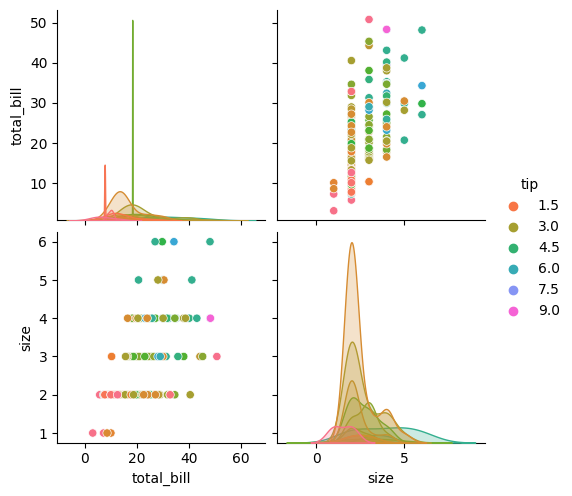

In [21]:
# Create the pair plot
sns.pairplot(df, hue='tip',palette='husl')
plt.show()

In [41]:
df1=df.copy()

In [42]:
#This line of code uses pandas' get_dummies() function to perform one-hot encoding on the specified categorical columns: day, sex, smoker, and time.
df1 = pd.get_dummies(df1, columns=["day",'sex','smoker','time'], drop_first=True)



In [38]:
# Select columns to normalize
numeric_features = ["total_bill", "size"]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the numeric columns
df1[numeric_features] = scaler.fit_transform(df1[numeric_features])

#This code  is normalizing the numerical features total_bill and size using StandardScaler.

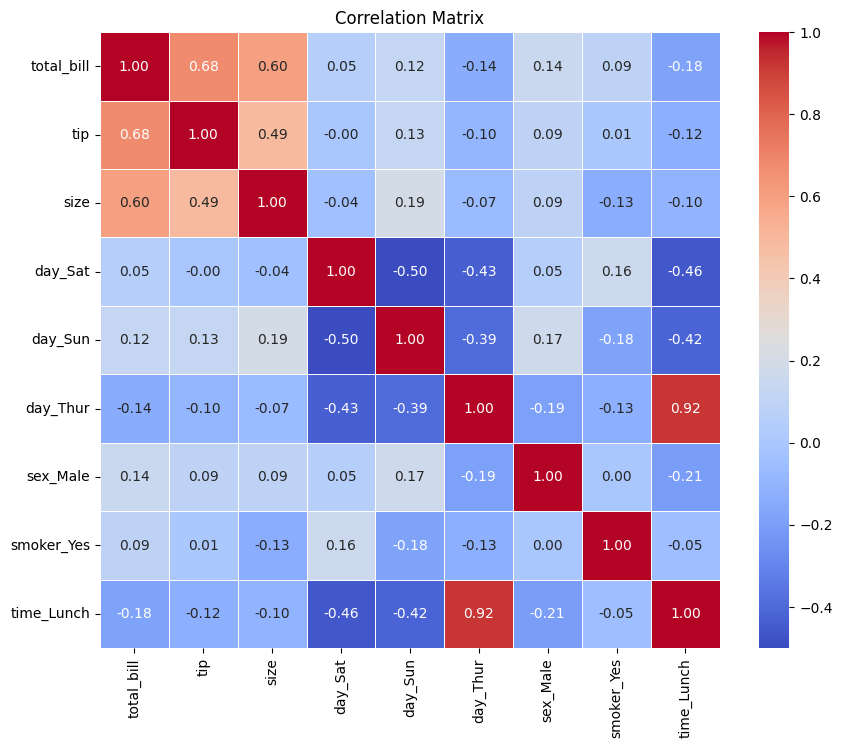

In [26]:
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Standardization

In [47]:
from sklearn.preprocessing import StandardScaler

X = df1[['total_bill','day_Thur','time_Lunch']].values  # Features
# X=df1.drop(columns=['tip'])
y = df1['tip'].values   # Target

#This code snippet prepares the data for model training.

## Train-Test Split

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#This code splits the dataset into training and testing sets.



<h1>Linear Regression</h1>

In [50]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

r2 = r2_score(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of predictors

# Calculating Adjusted R2
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('Linear Regression R2:', r2)
print("Mean Squared Error:", mse)
print("Adjusted R2:", adjusted_r2)

Linear Regression R2: 0.5413274619527865
Mean Squared Error: 0.5733275294225665
Adjusted R2: 0.5107492927496389


<h1>Ridge Regression</h1>

In [51]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of predictors

# Calculating Adjusted R2
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('Ridge Regression R2:', r2)
print("Mean Squared Error:", mse)
print("Adjusted R2:", adjusted_r2)

Ridge Regression R2: 0.5412916600853579
Mean Squared Error: 0.5733722807309594
Adjusted R2: 0.5107111040910484


<h1>Lasso Regression</h1>

In [52]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of predictors

# Calculating Adjusted R2
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('Lasso Regression R2:', r2)
print("Mean Squared Error:", mse)
print("Adjusted R2:", adjusted_r2)

Lasso Regression R2: 0.5448536563224031
Mean Squared Error: 0.5689198875026832
Adjusted R2: 0.5145105667438967


<h1>Random Forest Regressor</h1>

In [53]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=5,)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)


# Evaluation
r2 = r2_score(y_test, y_pred_forest)
mse = mean_squared_error(y_test, y_pred_forest)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of predictors

# Calculating Adjusted R2
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('Random forest Regression R2:', r2)
print("Mean Squared Error:", mse)
print("Adjusted R2:", adjusted_r2)

Random forest Regression R2: 0.2970663144373571
Mean Squared Error: 0.8786469645803062
Adjusted R2: 0.2502040687331809


<h1>Support Vector Regressor</h1>

In [54]:

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
r2 = r2_score(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of predictors

# Calculating Adjusted R2
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('Lasso Regression R2:', r2)
print("Mean Squared Error:", mse)
print("Adjusted R2:", adjusted_r2)



Lasso Regression R2: 0.5517509348474654
Mean Squared Error: 0.5602984869859899
Adjusted R2: 0.5218676638372964


<h1>KNN Regressor</h1>

In [55]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

r2 = r2_score(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of predictors

# Calculating Adjusted R2
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('KNN Regression R2:', r2)
print("Mean Squared Error:", mse)
print("Adjusted R2:", adjusted_r2)


KNN Regression R2: 0.44017400748745206
Mean Squared Error: 0.6997664489795917
Adjusted R2: 0.4028522746532822


The analysis indicates that the best predictors for the tip amount are the total bill, whether it's a Thursday, and if the meal is during Lunch. These variables have the most significant influence on tipping behavior, highlighting that the time of day, day of the week, and total bill amount are the key factors affecting how much customers tip.

# Analysis Summary

The analysis shows that Lasso Regression is the most effective model for predicting tip amounts, achieving better performance compared to other regression models based on higher R-squared scores and lower Mean Squared Error (MSE).